In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.family'] = 'Avenir'


In [3]:
# Recorded HBM result on train/testin/testout
hbm_pred_train = np.loadtxt('hbm_posterior_train.csv')
hbm_pred_testin = np.loadtxt('hbm_posterior_testin.csv')
hbm_pred_testout = np.loadtxt('hbm_posterior_testout.csv')

DATA_DIR = 'final_train_test_split/'
train_df = pd.read_csv(DATA_DIR + 'train.csv',index_col=0)
testin_df = pd.read_csv(DATA_DIR + 'test_in.csv',index_col=0)
testout_df = pd.read_csv(DATA_DIR + 'test_out.csv',index_col=0)

train_df['mean_dqdv_dchg_mid_3_0'] = np.log(train_df.mean_dqdv_dchg_mid_3_0)
testin_df['mean_dqdv_dchg_mid_3_0'] = np.log(testin_df.mean_dqdv_dchg_mid_3_0)
testout_df['mean_dqdv_dchg_mid_3_0'] = np.log(testout_df.mean_dqdv_dchg_mid_3_0)

train_df['delta_CV_time_03'] = np.log(abs(train_df.delta_CV_time_03))
testin_df['delta_CV_time_03'] = np.log(abs(testin_df.delta_CV_time_03))
testout_df['delta_CV_time_03'] = np.log(abs(testout_df.delta_CV_time_03))

In [4]:
# Generate some cluster index data for figure plotting
all_pred = np.concatenate((hbm_pred_train,hbm_pred_testin,hbm_pred_testout),axis=1)
all_df = pd.concat([train_df,testin_df,testout_df])
all_df.reset_index(inplace=True,drop=True)

cluster0_pred = all_df.loc[all_df.cluster_c4==0,:].index.values
cluster1_pred = all_df.loc[all_df.cluster_c4==1,:].index.values
cluster2_pred = all_df.loc[all_df.cluster_c4==2,:].index.values
cluster3_pred = all_df.loc[all_df.cluster_c4==3,:].index.values

transformer = StandardScaler()
individual_names = ['mean_dqdv_dchg_mid_3_0','delta_CV_time_03']
process_x_train = transformer.fit_transform(train_df.loc[:,individual_names])
process_x_testin = transformer.transform(testin_df.loc[:,individual_names])
process_x_testout = transformer.transform(testout_df.loc[:,individual_names])

hbm_intercepts = np.loadtxt('hbm_intercepts.csv')
hbm_slope0 = np.loadtxt('hbm_slope0s.csv')
hbm_slope1 = np.loadtxt('hbm_slope1s.csv')
hbm_noises = np.loadtxt('hbm_noises.csv')

C:\Users\sann7383\AppData\Local\Temp/ipykernel_5856/2209329911.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax2.errorbar(y=all_pred.mean(0)[cluster0_pred], x=all_df.Lifetime.values[cluster0_pred], yerr=2*np.std(all_pred[:,cluster0_pred],axis=0),fmt='.k',markersize=8,color='#1B9805',ecolor='cyan',alpha=1,label='Cluster 0')
C:\Users\sann7383\AppData\Local\Temp/ipykernel_5856/2209329911.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax3.errorbar(y=all_pred.mean(0)[cluster1_pred], x=all_df.Lifetime.values[cluster1_pred], yerr=2*np.std(all_pred[:,cluster1_pred],axis=0),fmt='.k',markersize=8,color='#056498',ecolor='cyan',alpha=1,label='Cluster 1')
C:\Users\sann7383\AppData\Local\Temp/ipykernel_5856/2209329911.py:80: UserWarning: color is redundantly define

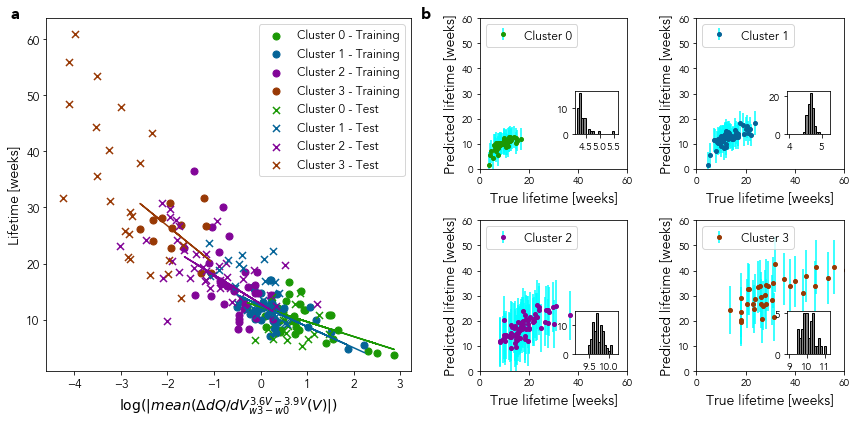

In [8]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12,6))

gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[:2, :2])
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[0, 3])
ax4 = plt.subplot(gs[1, 2])
ax5 = plt.subplot(gs[1, 3])


train_index0 = list(train_df.loc[train_df.cluster_c4 == 0].index)
train_index1 = list(train_df.loc[train_df.cluster_c4 == 1].index)
train_index2 = list(train_df.loc[train_df.cluster_c4 == 2].index)
train_index3 = list(train_df.loc[train_df.cluster_c4 == 3].index)

testin_index0 = list(testin_df.loc[testin_df.cluster_c4 == 0].index)
testin_index1 = list(testin_df.loc[testin_df.cluster_c4 == 1].index)
testin_index2 = list(testin_df.loc[testin_df.cluster_c4 == 2].index)
testin_index3 = list(testin_df.loc[testin_df.cluster_c4 == 3].index)

testout_index0 = list(testout_df.loc[testout_df.cluster_c4 == 0].index)
testout_index1 = list(testout_df.loc[testout_df.cluster_c4 == 1].index)
testout_index2 = list(testout_df.loc[testout_df.cluster_c4 == 2].index)
testout_index3 = list(testout_df.loc[testout_df.cluster_c4 == 3].index)

log_pred_0 =  process_x_train[train_index0,0] * hbm_slope0.mean(0)[0]  + hbm_intercepts.mean(0)[0]
log_pred_1 =  process_x_train[train_index1,0] * hbm_slope0.mean(0)[1]  + hbm_intercepts.mean(0)[1]
log_pred_2 =  process_x_train[train_index2,0] * hbm_slope0.mean(0)[2]  + hbm_intercepts.mean(0)[2]
log_pred_3 =  process_x_train[train_index3,0] * hbm_slope0.mean(0)[3]  + hbm_intercepts.mean(0)[3]

ax1.plot(process_x_train[train_index0,0], log_pred_0, color='#1B9805')
ax1.plot(process_x_train[train_index1,0], log_pred_1, color='#056498')
ax1.plot(process_x_train[train_index2,0], log_pred_2, color='#820598')
ax1.plot(process_x_train[train_index3,0], log_pred_3, color='#983905')

ax1.scatter(process_x_train[train_index0,0], train_df.Lifetime.values[train_index0], color='#1B9805', marker='o', s=50,label='Cluster 0 - Training')
ax1.scatter(process_x_train[train_index1,0], train_df.Lifetime.values[train_index1], color='#056498',marker='o', s=50,label='Cluster 1 - Training')
ax1.scatter(process_x_train[train_index2,0], train_df.Lifetime.values[train_index2], color='#820598',marker='o', s=50,label='Cluster 2 - Training')
ax1.scatter(process_x_train[train_index3,0], train_df.Lifetime.values[train_index3], color='#983905',marker='o', s=50,label='Cluster 3 - Training')

ax1.scatter(process_x_testin[testin_index0,0], testin_df.Lifetime.values[testin_index0],color='#1B9805',marker='x', s=50,label='Cluster 0 - Test')
ax1.scatter(process_x_testin[testin_index1,0], testin_df.Lifetime.values[testin_index1],color='#056498',marker='x', s=50,label='Cluster 1 - Test')
ax1.scatter(process_x_testin[testin_index2,0], testin_df.Lifetime.values[testin_index2],color='#820598',marker='x', s=50,label='Cluster 2 - Test')
ax1.scatter(process_x_testin[testin_index3,0], testin_df.Lifetime.values[testin_index3],color='#983905',marker='x', s=50,label='Cluster 3 - Test')

ax1.scatter(process_x_testout[testout_index0,0], testout_df.Lifetime.values[testout_index0],color='#1B9805',marker='x',s=50)
ax1.scatter(process_x_testout[testout_index1,0], testout_df.Lifetime.values[testout_index1],color='#056498',marker='x',s=50)
ax1.scatter(process_x_testout[testout_index2,0], testout_df.Lifetime.values[testout_index2],color='#820598',marker='x',s=50)
ax1.scatter(process_x_testout[testout_index3,0], testout_df.Lifetime.values[testout_index3],color='#983905',marker='x',s=50)
ax1.set_xlabel(r'$\log (\left|mean(\Delta dQ/dV_{w3-w0}^{3.6V-3.9V}(V)\right|)$',fontsize=14)
ax1.set_ylabel('Lifetime [weeks]',fontsize=14)
ax1.tick_params(axis='both', labelsize=12)

ax1.legend(fontsize=12)


ax2.errorbar(y=all_pred.mean(0)[cluster0_pred], x=all_df.Lifetime.values[cluster0_pred], yerr=2*np.std(all_pred[:,cluster0_pred],axis=0),fmt='.k',markersize=8,color='#1B9805',ecolor='cyan',alpha=1,label='Cluster 0')
ax2.set_xlim([0,60])
ax2.set_ylim([0,60])
ax2.set_xlabel('True lifetime [weeks]',fontsize=14)
ax2.set_ylabel('Predicted lifetime [weeks]',fontsize=14)
ax2.legend(loc='upper left',fontsize=12)
binbound_ax2 = np.linspace(4.2,5.6,20)
ax2_hist = fig.add_axes([0.67,0.68,0.05,0.1])
ax2_hist.hist(2*np.std(all_pred[:,cluster0_pred],axis=0),bins=binbound_ax2, color='grey',edgecolor='black')
ax2_hist.tick_params(labelsize=10)

ax3.errorbar(y=all_pred.mean(0)[cluster1_pred], x=all_df.Lifetime.values[cluster1_pred], yerr=2*np.std(all_pred[:,cluster1_pred],axis=0),fmt='.k',markersize=8,color='#056498',ecolor='cyan',alpha=1,label='Cluster 1')
ax3.set_xlim([0,60])
ax3.set_ylim([0,60])
ax3.set_xlabel('True lifetime [weeks]',fontsize=14)
ax3.set_ylabel('Predicted lifetime [weeks]',fontsize=14)
ax3.legend(loc='upper left',fontsize=12)
binbound_ax3 = np.linspace(4.0,5.2,20)
ax3_hist = fig.add_axes([0.915,0.68,0.05,0.1])
ax3_hist.hist(2*np.std(all_pred[:,cluster1_pred],axis=0),bins=binbound_ax3, color='grey',edgecolor='black')
ax3_hist.tick_params(labelsize=10)

ax4.errorbar(y=all_pred.mean(0)[cluster2_pred], x=all_df.Lifetime.values[cluster2_pred], yerr=2*np.std(all_pred[:,cluster2_pred],axis=0),fmt='.k',markersize=8,color='#820598',ecolor='cyan',alpha=1,label='Cluster 2')
ax4.set_xlim([0,60])
ax4.set_ylim([0,60])
ax4.set_xlabel('True lifetime [weeks]',fontsize=14)
ax4.set_ylabel('Predicted lifetime [weeks]',fontsize=14)
ax4.legend(loc='upper left',fontsize=12)
binbound_ax4 = np.linspace(9.2, 10.2,20)
ax4_hist = fig.add_axes([0.67,0.17,0.05,0.1])
ax4_hist.hist(2*np.std(all_pred[:,cluster2_pred],axis=0),bins=binbound_ax4, color='grey',edgecolor='black')
ax4_hist.tick_params(labelsize=10)

ax5.errorbar(y=all_pred.mean(0)[cluster3_pred], x=all_df.Lifetime.values[cluster3_pred], yerr=2*np.std(all_pred[:,cluster3_pred],axis=0),fmt='.k',markersize=8,color='#983905',ecolor='cyan',alpha=1,label='Cluster 3')
ax5.set_xlim([0,60])
ax5.set_ylim([0,60])
ax5.set_xlabel('True lifetime [weeks]',fontsize=14)
ax5.set_ylabel('Predicted lifetime [weeks]',fontsize=14)
ax5.legend(loc='upper left',fontsize=12)
binbound_ax5 = np.linspace(9.0, 11.2,20)
ax5_hist = fig.add_axes([0.915,0.17,0.05,0.1])
ax5_hist.hist(2*np.std(all_pred[:,cluster3_pred],axis=0),bins=binbound_ax5, color='grey',edgecolor='black')
ax5_hist.tick_params(labelsize=10)


ax1.text(-0.1, 1, 'a', transform=ax1.transAxes, size=16,weight='bold')
ax2.text(-0.4, 1, 'b', transform=ax2.transAxes, size=16,weight='bold')

plt.tight_layout()

C:\Users\sann7383\AppData\Local\Temp/ipykernel_5856/1215610022.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


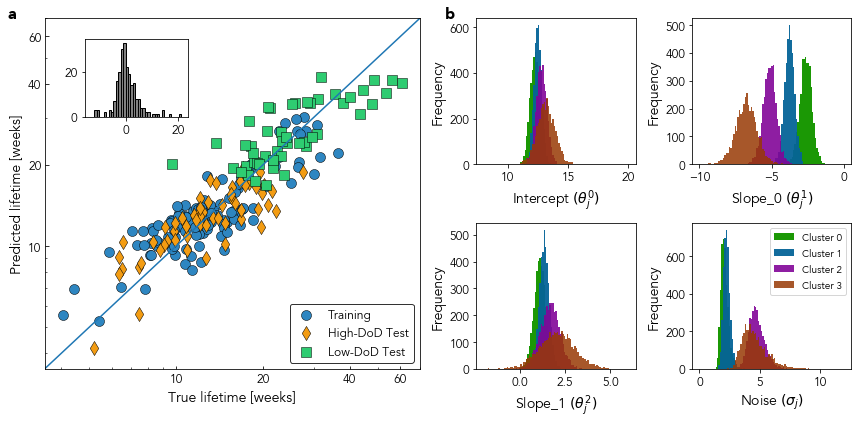

In [9]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12,6))

gs = gridspec.GridSpec(2, 4)
ax1 = plt.subplot(gs[:2, :2])
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[0, 3])
ax4 = plt.subplot(gs[1, 2])
ax5 = plt.subplot(gs[1, 3])

ax1.scatter(train_df.Lifetime.values, hbm_pred_train.mean(0), s=100, marker='o', c='#2E86C1', edgecolors='black',linewidth=0.5,label='Training')
ax1.scatter(testin_df.Lifetime.values, hbm_pred_testin.mean(0), s=100,marker='d', c='#F39C12',edgecolors='black',linewidth=0.5,label='High-DoD Test')
ax1.scatter(testout_df.Lifetime.values, hbm_pred_testout.mean(0), s=90,marker='s', c='#2ECC71',edgecolors='black',linewidth=0.5,label='Low-DoD Test')
ax1.plot([0, 70],[0, 70])
# ax1.set_xlim(0,65)
# ax1.set_ylim(0,65)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(3.5,70)
ax1.set_ylim(3.5,70)
# ax1.tick_params(bottom=True, top=True, left=True, right=True)
ax1.set_xticks([10,20,40,60])
ax1.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax1.set_yticks([10,20,40,60])
ax1.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax1.tick_params(axis='x', direction='in', which='both',labelsize=12)
ax1.tick_params(axis='y', direction='in', which='both',labelsize=12)
# ax1.text(-0.1, 1.05, 'a', transform=ax1.transAxes, size=18)
lgd = ax1.legend(frameon=True,loc='lower right',fontsize=12)
frame = lgd.get_frame()
frame.set_edgecolor('black')


errors_train = train_df.Lifetime.values - hbm_pred_train.mean(0)
errors_testin = testin_df.Lifetime.values - hbm_pred_testin.mean(0)
errors_testout = testout_df.Lifetime.values - hbm_pred_testout.mean(0)
errors = np.concatenate((errors_train,errors_testin,errors_testout))

ax1_hist = fig.add_axes([0.1,0.72,0.12,0.18])
binbound_ax1 = np.linspace(-14,22,40)
ax1_hist.hist(errors,bins=binbound_ax1, range=(-20,20), color='grey',edgecolor='black')
ax1_hist.tick_params(labelsize=12)

ax1.set_xlabel('True lifetime [weeks]',fontsize=14)
ax1.set_ylabel('Predicted lifetime [weeks]',fontsize=14)


binbounds_intercepts = np.linspace(8,20,100)
ax2.hist(hbm_intercepts[:,0],bins=binbounds_intercepts,alpha=1,color='#1B9805')
ax2.hist(hbm_intercepts[:,1],bins=binbounds_intercepts,alpha=0.95,color='#056498')
ax2.hist(hbm_intercepts[:,2],bins=binbounds_intercepts,alpha=0.9,color='#820598')
ax2.hist(hbm_intercepts[:,3],bins=binbounds_intercepts,alpha=0.85,color='#983905')
ax2.set_xlabel(r'Intercept $(\theta_{j}^0)$',fontsize=14)
ax2.set_ylabel('Frequency',fontsize=14)
ax2.tick_params(axis='both', labelsize=12)

binbounds_slope0 = np.linspace(-10,0,100)
ax3.hist(hbm_slope0[:,0],bins=binbounds_slope0,alpha=1,color='#1B9805')
ax3.hist(hbm_slope0[:,1],bins=binbounds_slope0,alpha=0.95,color='#056498')
ax3.hist(hbm_slope0[:,2],bins=binbounds_slope0,alpha=0.9,color='#820598')
ax3.hist(hbm_slope0[:,3],bins=binbounds_slope0,alpha=0.85,color='#983905')
ax3.set_xlabel(r'Slope_0 $(\theta_{j}^1)$',fontsize=14)
ax3.set_ylabel('Frequency',fontsize=14)
ax3.tick_params(axis='both', labelsize=12)

binbounds_slope1 = np.linspace(-2,6,100)
ax4.hist(hbm_slope1[:,0],bins=binbounds_slope1,alpha=1,color='#1B9805')
ax4.hist(hbm_slope1[:,1],bins=binbounds_slope1,alpha=0.95,color='#056498')
ax4.hist(hbm_slope1[:,2],bins=binbounds_slope1,alpha=0.9,color='#820598')
ax4.hist(hbm_slope1[:,3],bins=binbounds_slope1,alpha=0.85,color='#983905')
ax4.set_xlabel(r'Slope_1 $(\theta_{j}^2)$',fontsize=14)
ax4.set_ylabel('Frequency',fontsize=14)
ax4.tick_params(axis='both', labelsize=12)

binbounds_noise = np.linspace(0,12,100)
ax5.hist(hbm_noises[:,0],bins=binbounds_noise,alpha=1,label='Cluster 0',color='#1B9805')
ax5.hist(hbm_noises[:,1],bins=binbounds_noise,alpha=0.95,label='Cluster 1',color='#056498')
ax5.hist(hbm_noises[:,2],bins=binbounds_noise,alpha=0.9,label='Cluster 2',color='#820598')
ax5.hist(hbm_noises[:,3],bins=binbounds_noise,alpha=0.85,label='Cluster 3',color='#983905')
ax5.set_xlabel('Noise $(\sigma_{j})$',fontsize=14)
ax5.set_ylabel('Frequency',fontsize=14)
ax5.tick_params(axis='both', labelsize=12)
ax5.legend(fontsize=10)

ax1.text(-0.1, 1.0, 'a', transform=ax1.transAxes, size=16,weight='bold')
ax2.text(-0.2, 1.0, 'b', transform=ax2.transAxes, size=16,weight='bold')

plt.tight_layout()